In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
import numpy as np
import os

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

In [5]:
from sklearn.datasets import fetch_mldata

In [6]:
from sklearn import datasets

In [7]:
datasets.get_data_home()

'/root/scikit_learn_data'

In [8]:
!wget https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat -P /root/scikit_learn_data/mldata/

--2019-01-30 16:58:54--  https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/amplab/datascience-sp14/master/lab7/mldata/mnist-original.mat [following]
--2019-01-30 16:58:55--  https://raw.githubusercontent.com/amplab/datascience-sp14/master/lab7/mldata/mnist-original.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55440440 (53M) [application/octet-stream]
Saving to: ‘/root/scikit_learn_data/mldata/mnist-original.mat.2’

100%[======================================>] 55,440,440  1.45MB/s   in 35s    

2019-01-30 16:59:30 (1.53 MB/s)

In [9]:
mnist = fetch_mldata('MNIST original')

In [10]:
mnist["data"]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
mnist["target"]

array([0., 0., 0., ..., 9., 9., 9.])

In [12]:
mnist.data.shape

(70000, 784)

In [13]:
X, y = mnist["data"], mnist["target"]

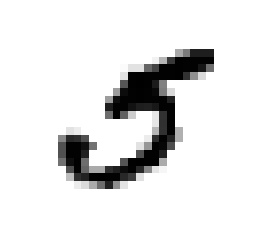

In [14]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [16]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

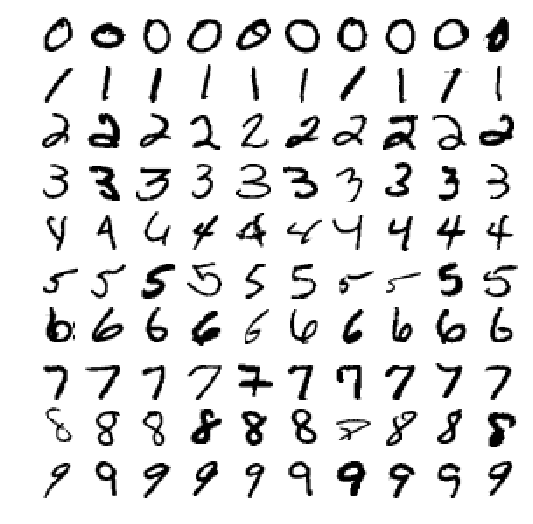

In [17]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [18]:
y[36000]

5.0

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### 이진분류

In [20]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [21]:
y_train_5 = (y_train == 5)

In [22]:
y_test_5 = (y_test == 5)

#### 확률적 경사 하강법(SGD: Stochastic Gradient Descent)

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
sgd_clf = SGDClassifier(max_iter=4, tol=-np.infty, random_state=42)

In [25]:
ss = StandardScaler()

In [26]:
X_train_scaled = ss.fit_transform(X_train)

/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
X_test_scaled = ss.transform(X_test)

/usr/lib64/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
sgd_clf.fit(X_train_scaled, y_train_5)
# This will output True, False

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=4, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

In [29]:
X_train_scaled[0].shape

(784,)

In [30]:
some_digit.shape

(784,)

In [31]:
some_digit = ss.transform([some_digit])

In [32]:
sgd_clf.predict(some_digit)

array([False])

In [33]:
some_digit

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.41807799e-03, -5.75481961e-03, -4.08251693e-03,
        -4.08251693e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.08251693e-03,
        -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
        -1.47589798e-02, -1.92848546e-02, -2.46717975e-02,
        -2.90710271e-02, -3.05926583e-02, -3.11640127e-02,
        -3.19628719e-02, -3.02025355e-02, -3.13102175e-02,
        -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
        -1.67723008e-02, -1.09963601e-02, -8.32486080e-0

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(sgd_clf, X_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([0.96785, 0.96705, 0.967  ])

In [36]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_train_5, y_train_pred)

array([[53998,   581],
       [ 1381,  4040]])

In [42]:
y_train_perfect_predictions = y_train_5

In [43]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [44]:
from sklearn.metrics import precision_score, recall_score

#### 정밀도 vs. 재현율

In [45]:
precision_score(y_train_5, y_train_pred)

0.8742696386063623

In [46]:
recall_score(y_train_5, y_train_pred)

0.7452499538830474

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y_train_5, y_train_pred)

0.8046205935072694

In [49]:
y_scores = sgd_clf.decision_function(some_digit)

In [50]:
y_scores

array([-25.65293896])

In [51]:
y_scores = cross_val_predict(sgd_clf, X_train_scaled, y_train_5, cv=3,
                             method="decision_function")

In [52]:
y_scores

array([-1352.3017308 , -4210.18282536, -2106.82326361, ...,
       -1420.74510591, -1858.48504269, -1091.78067647])

In [53]:
from sklearn.metrics import precision_recall_curve

In [54]:
precisions, recalls, thresholds = precision_recall_curve(
    y_train_5, 
    y_scores)

In [55]:
precisions.shape, recalls.shape, thresholds.shape

((59315,), (59315,), (59314,))

In [56]:
thresholds

array([-3120.56931017, -3119.98654558, -3118.80647085, ...,
        1621.79728382,  1665.74642939,  1775.04204445])

In [57]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

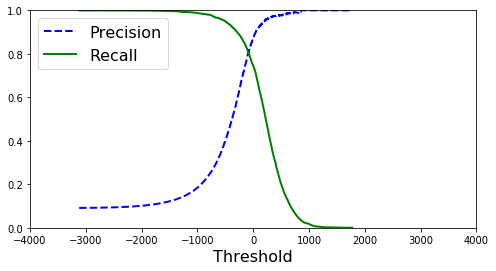

In [58]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-4000, 4000])
plt.show()

#### ROC

In [59]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

In [60]:
(y_train_pred == (y_scores > 0)).all()

True

In [61]:
y_train_pred_90 = (y_scores > 700)

In [62]:
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [63]:
precision_score(y_train_5, y_train_pred_90)

0.9850427350427351

In [64]:
recall_score(y_train_5, y_train_pred_90)

0.08503966057922892

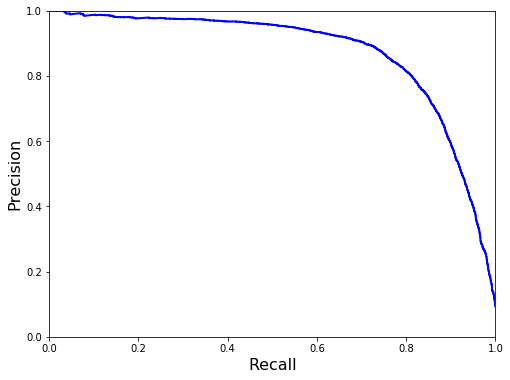

In [65]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [66]:
from sklearn.metrics import roc_curve

In [67]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [68]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

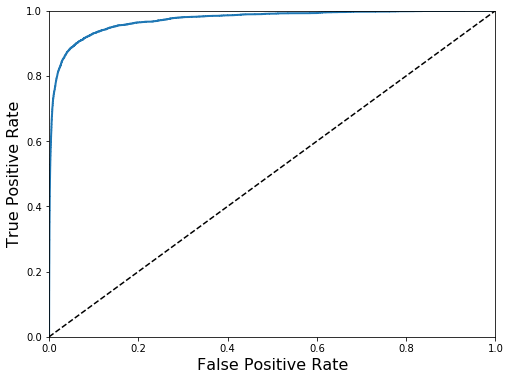

In [69]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
roc_auc_score(y_train_5, y_scores)

0.9724398487121284

#### 랜덤포레스트

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train_scaled, y_train_5, cv=3,
                                    method="predict_proba")

In [74]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

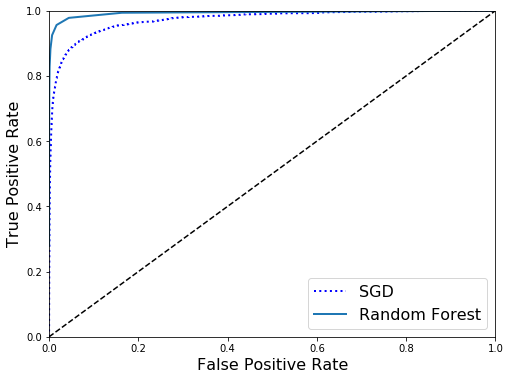

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [76]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931331224717448

In [77]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [78]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

#### 다중분류

In [79]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(some_digit)

array([5.])

In [80]:
some_digit_scores = sgd_clf.decision_function(some_digit)

In [81]:
some_digit_scores

array([[ 2531.05598498,   560.38753152,  -132.99500793,  3637.53408366,
         -737.75921232,  6381.36084766, -5747.40463096,  1108.24293639,
        -7467.2223228 , -5576.26280606]])

In [82]:
np.argmax(some_digit_scores)

5

In [83]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [84]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

5.0

In [85]:
from sklearn.multiclass import OneVsOneClassifier

In [86]:
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train_scaled, y_train)
ovo_clf.predict(some_digit)

array([5.])

In [87]:
np.argmax(ovo_clf.decision_function(some_digit))

5

In [88]:
len(ovo_clf.estimators_)

45

#### 랜덤포레스트 분류기는 직접 샘플을 다중 클래스로 분류, 별도의 OvO, OvA 적용 필요 없음

In [89]:
forest_clf.fit(X_train_scaled, y_train)
forest_clf.predict(some_digit)

array([5.])

#### 각 샘플에 부여한 클래스별 확률

In [90]:
forest_clf.predict_proba(some_digit)

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [91]:
sorted(forest_clf.predict_proba(some_digit)[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.8]

In [92]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91071786, 0.90854543, 0.90778617])

In [93]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [94]:
conf_mx, conf_mx.shape

(array([[5738,    2,   24,   10,   11,   45,   40,   11,   39,    3],
        [   2, 6485,   44,   27,    5,   37,    6,    8,  116,   12],
        [  56,   39, 5334,   90,   83,   24,   98,   60,  159,   15],
        [  56,   43,  139, 5330,    1,  228,   33,   60,  143,   98],
        [  17,   27,   32,    9, 5350,    7,   57,   35,   77,  231],
        [  72,   47,   34,  187,   68, 4564,  118,   32,  199,  100],
        [  38,   30,   39,    2,   39,   82, 5632,    9,   46,    1],
        [  26,   20,   68,   29,   49,   12,    5, 5786,   16,  254],
        [  57,  165,   76,  145,   15,  153,   59,   25, 5012,  144],
        [  43,   31,   26,   84,  153,   24,    2,  197,   79, 5310]]),
 (10, 10))

#### 오차행렬 가시화

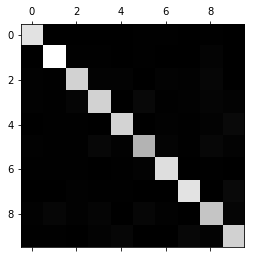

In [95]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [96]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [97]:
row_sums, row_sums.shape

(array([[5923],
        [6742],
        [5958],
        [6131],
        [5842],
        [5421],
        [5918],
        [6265],
        [5851],
        [5949]]), (10, 1))

In [98]:
col_sums = conf_mx.sum(axis=0, keepdims=True)

In [99]:
col_sums, col_sums.shape

(array([[6105, 6889, 5816, 5913, 5774, 5176, 6050, 6223, 5886, 6168]]),
 (1, 10))

In [100]:
norm_conf_mx = conf_mx / row_sums

In [101]:
norm_conf_mx

array([[9.68765828e-01, 3.37666723e-04, 4.05200068e-03, 1.68833361e-03,
        1.85716698e-03, 7.59750127e-03, 6.75333446e-03, 1.85716698e-03,
        6.58450110e-03, 5.06500084e-04],
       [2.96647879e-04, 9.61880748e-01, 6.52625334e-03, 4.00474637e-03,
        7.41619697e-04, 5.48798576e-03, 8.89943637e-04, 1.18659152e-03,
        1.72055770e-02, 1.77988727e-03],
       [9.39912722e-03, 6.54582075e-03, 8.95266868e-01, 1.51057402e-02,
        1.39308493e-02, 4.02819738e-03, 1.64484726e-02, 1.00704935e-02,
        2.66868077e-02, 2.51762336e-03],
       [9.13390964e-03, 7.01353776e-03, 2.26716686e-02, 8.69352471e-01,
        1.63105529e-04, 3.71880607e-02, 5.38248247e-03, 9.78633176e-03,
        2.33240907e-02, 1.59843419e-02],
       [2.90996234e-03, 4.62170490e-03, 5.47757617e-03, 1.54056830e-03,
        9.15782266e-01, 1.19821979e-03, 9.75693256e-03, 5.99109894e-03,
        1.31804177e-02, 3.95412530e-02],
       [1.32816823e-02, 8.66998709e-03, 6.27190555e-03, 3.44954805e-02,
   

In [102]:
np.fill_diagonal(norm_conf_mx, 0)

In [103]:
norm_conf_mx

array([[0.        , 0.00033767, 0.004052  , 0.00168833, 0.00185717,
        0.0075975 , 0.00675333, 0.00185717, 0.0065845 , 0.0005065 ],
       [0.00029665, 0.        , 0.00652625, 0.00400475, 0.00074162,
        0.00548799, 0.00088994, 0.00118659, 0.01720558, 0.00177989],
       [0.00939913, 0.00654582, 0.        , 0.01510574, 0.01393085,
        0.0040282 , 0.01644847, 0.01007049, 0.02668681, 0.00251762],
       [0.00913391, 0.00701354, 0.02267167, 0.        , 0.00016311,
        0.03718806, 0.00538248, 0.00978633, 0.02332409, 0.01598434],
       [0.00290996, 0.0046217 , 0.00547758, 0.00154057, 0.        ,
        0.00119822, 0.00975693, 0.0059911 , 0.01318042, 0.03954125],
       [0.01328168, 0.00866999, 0.00627191, 0.03449548, 0.01254381,
        0.        , 0.0217672 , 0.00590297, 0.03670909, 0.01844678],
       [0.00642109, 0.00506928, 0.00659006, 0.00033795, 0.00659006,
        0.01385603, 0.        , 0.00152078, 0.0077729 , 0.00016898],
       [0.00415004, 0.00319234, 0.0108539

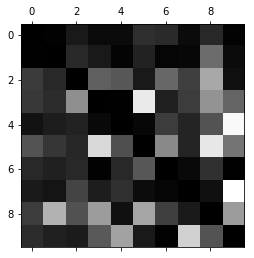

In [104]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

#### 행은 실제 클래스, 열은 예측 클래스

#### 다중 레이블 분류

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [107]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [108]:
knn_clf.predict(some_digit)

array([[False,  True]])

In [109]:
# y_train_knn_pred = cross_val_predict(knn_clf, X_train_scaled, y_multilabel, cv=3)
# f1_score(y_multilabel, y_train_knn_pred, average="macro")

#### 다중 출력 분류

In [110]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [111]:
noise, noise.shape

(array([[96, 98, 50, ..., 93,  4,  1],
        [29, 98,  9, ..., 27, 49, 15],
        [40,  8,  1, ..., 94, 74, 68],
        ...,
        [60, 38, 72, ..., 40, 78, 99],
        [72, 92, 59, ..., 42, 89, 28],
        [79, 35, 95, ..., 15, 58, 99]]), (60000, 784))

In [112]:
X_train_mod = X_train + noise

In [113]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [114]:
noise, noise.shape

(array([[ 1, 33, 56, ..., 94,  5, 20],
        [12, 43, 26, ..., 74, 72, 67],
        [42, 93, 52, ..., 30, 81, 10],
        ...,
        [20,  7, 30, ..., 94, 20, 98],
        [76, 35, 72, ...,  9, 22, 56],
        [50, 23, 15, ..., 45,  5, 17]]), (10000, 784))

In [115]:
X_test_mod = X_test + noise

In [116]:
y_train_mod = X_train
y_test_mod = X_test

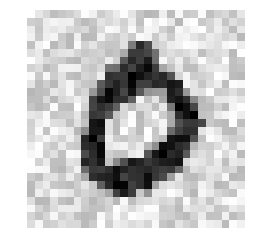

In [123]:
plot_digit(X_test_mod[0])

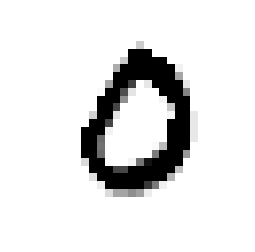

In [120]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)